In [3]:
import pandas as pd

df = pd.read_csv("Amazon Sale Report.csv")  # Adjust name/format if needed
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

C:\Users\anvis\AppData\Local\Temp\ipykernel_21596\405171609.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])  # Replace with actual column


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Date'>

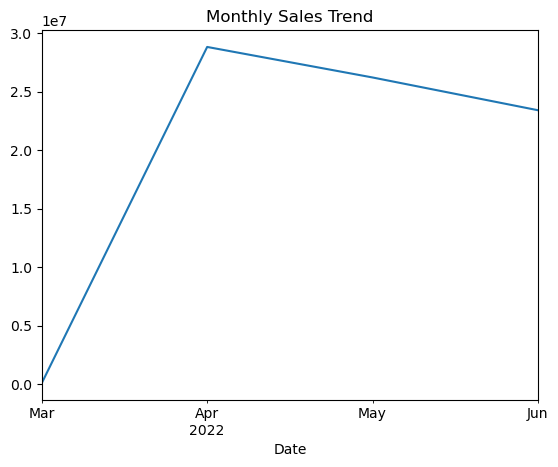

In [5]:
df['Date'] = pd.to_datetime(df['Date'])  # Replace with actual column
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')


<Axes: title={'center': 'Product Size Distribution'}, xlabel='Size'>

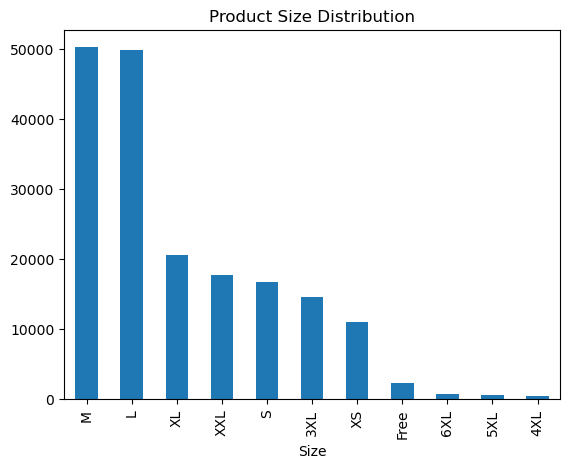

In [6]:
df['Category'].value_counts().head(10).plot(kind='bar', title='Top 10 Categories')
df['Size'].value_counts().plot(kind='bar', title='Product Size Distribution')


<Axes: title={'center': 'Sales by Fulfilled-by'}, xlabel='fulfilled-by'>

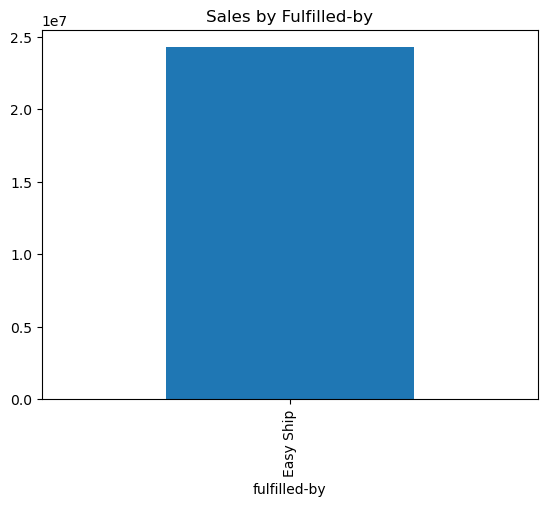

In [7]:
df['Fulfilment'].value_counts().plot(kind='bar', title='Fulfilment Methods')
df.groupby('fulfilled-by')['Amount'].sum().plot(kind='bar', title='Sales by Fulfilled-by')


<Axes: title={'center': 'Order Status'}, ylabel='count'>

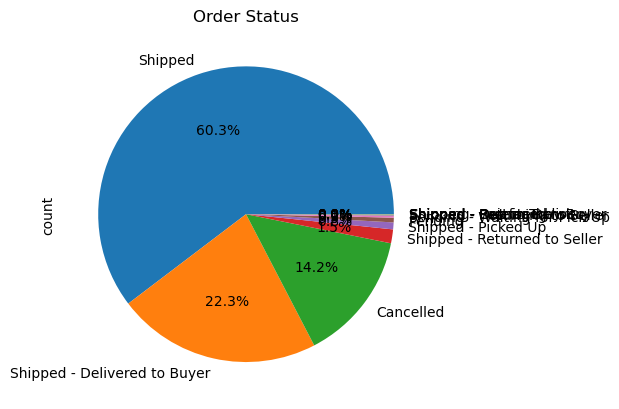

In [6]:
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%',title='Order Status')



<Axes: title={'center': 'Courier Status'}, xlabel='Courier Status'>

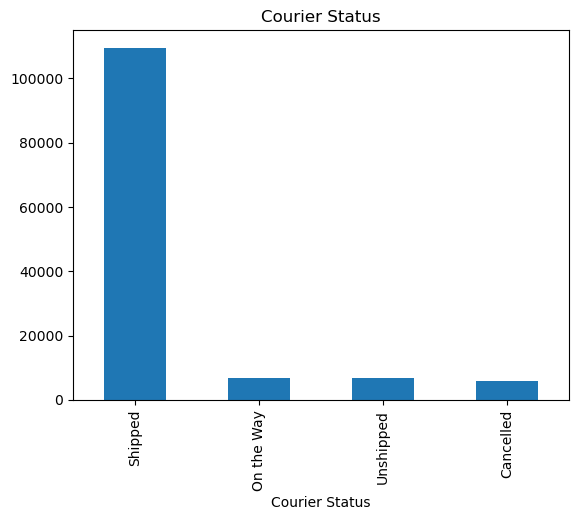

In [7]:
df['Courier Status'].value_counts().plot(kind='bar',title='Courier Status')

<Axes: title={'center': 'Top 10 Cities by Sales'}, xlabel='ship-city'>

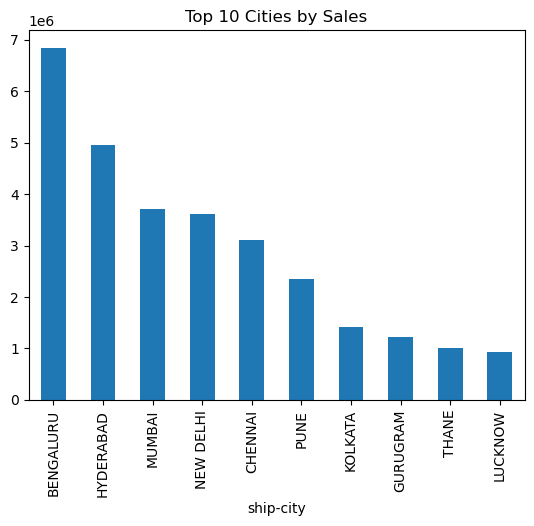

In [11]:
customer_location = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)
customer_location.plot(kind='bar', title='Top 10 Cities by Sales')


<Axes: title={'center': 'Sales by State'}, xlabel='ship-state'>

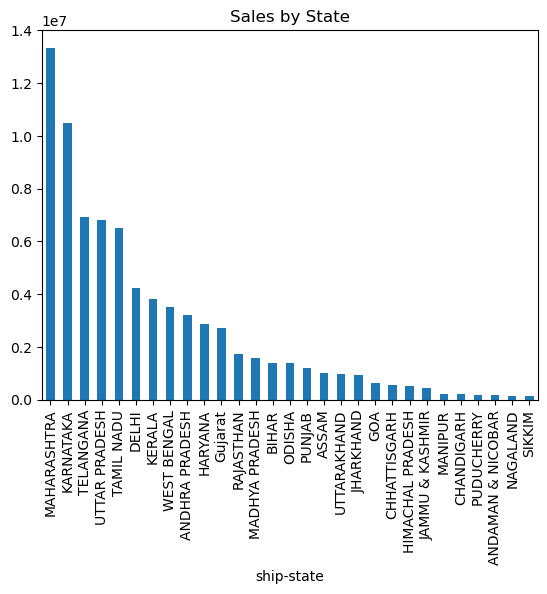

In [13]:
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(29)
state_sales.plot(kind='bar', title='Sales by State')


<Axes: title={'center': 'B2B vs B2C Sales'}, xlabel='B2B'>

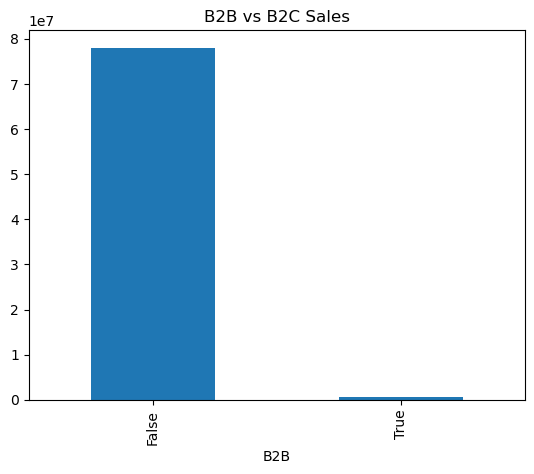

In [13]:
df.groupby('B2B')['Amount'].sum().plot(kind='bar', title='B2B vs B2C Sales')


Counts:
 B2B
False    128104
True        872
Name: count, dtype: int64

Percentages:
 B2B
False    99.323905
True      0.676095
Name: count, dtype: float64


<Axes: title={'center': 'B2B vs B2C - % of Sales'}, xlabel='B2B'>

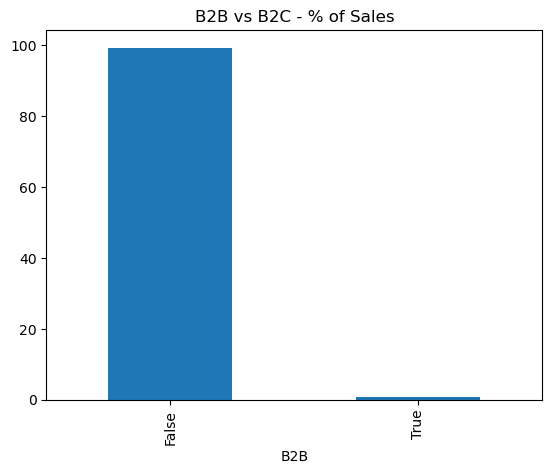

In [14]:
# Count number of sales (orders) for B2B vs B2C
b2b_sales_count = df['B2B'].value_counts()

# Convert to percentage
b2b_sales_percent = (b2b_sales_count / b2b_sales_count.sum()) * 100

# Display counts and percentages
print("Counts:\n", b2b_sales_count)
print("\nPercentages:\n", b2b_sales_percent)

# Plot percentage as bar chart
b2b_sales_percent.plot(kind='bar', title='B2B vs B2C - % of Sales')


In [15]:
df['PendingS'].value_counts()
df['New'].value_counts()


Series([], Name: count, dtype: int64)

In [16]:
print(df.columns)  # check exact names


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


In [19]:
df['PendingS'].isnull().sum()
if df['PendingS'].notnull().sum() == 0:
    print("No data available for PendingS column.")


No data available for PendingS column.


In [18]:
if df['PendingS'].notnull().sum() == 0:
    print("No data available for PendingS column.")


No data available for PendingS column.


In [20]:
df['PendingS'] = df['PendingS'].fillna("Unknown")
df['PendingS'].value_counts()


PendingS
Unknown    128976
Name: count, dtype: int64